In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json
json_path = r"C:\Users\Joseph\Desktop\mouse_movements_data.json"
with open(json_path, "r") as fp:
    data = json.load(fp)
len(data), type(data)

(83797, list)

Each event session dictionary is a list of dictionaries with the keys:
* `clientX`, `clientY`: (X, Y) coordinates
* `type`: type of movement (mousemove, mouseup, pointerdown, click)
    * generally not that important
* `timeDiff`: time of the movement since the beginning
---
Note: I referring to:
* `data[i]` --> `session_dict`
* `session_dict["events"]` --> `events`
* `events[i]` --> `entry`

In [36]:
json.loads(data[0]["events"])

[{'clientX': 915, 'clientY': 154, 'type': 'mousemove', 'timeDiff': 9779},
 {'clientX': 915.5556030273438,
  'clientY': 154.4444580078125,
  'type': 'pointerdown',
  'timeDiff': 9780},
 {'clientX': 915, 'clientY': 154, 'type': 'mousedown', 'timeDiff': 9780},
 {'clientX': 915.5556030273438,
  'clientY': 154.4444580078125,
  'type': 'pointerup',
  'timeDiff': 9797},
 {'clientX': 915, 'clientY': 154, 'type': 'mouseup', 'timeDiff': 9797},
 {'clientX': 915, 'clientY': 154, 'type': 'click', 'timeDiff': 9798}]

Analyzing the distribution of the number of mouse events per session dictionary

In [3]:
import numpy as np
def get_stats(events):
    """
    Min, Max, Mean, STD
    """
    events = np.array(events)
    print(f"Min: {events.min()}, Max: {events.max()},\nMean: {events.mean()}, STD: {events.std()}")

In [37]:
num_events = [len(json.loads(session_dict["events"])) for session_dict in data]
assert len(num_events) == len(data)

In [38]:
get_stats(num_events)

Min: 1, Max: 1539,
Mean: 164.56595104836688, STD: 185.17127342239542


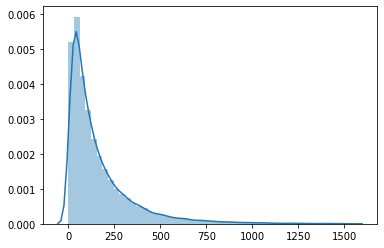

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(num_events)

Analyzing the time diffs

In [4]:
time_diffs = []
for session_dict in tqdm(data):
    events_list = json.loads(session_dict["events"])
    for entry in events_list:
        time_diffs.append(entry["timeDiff"])
num_entries = len(time_diffs)
print(f"Number of entries: {num_entries}")

100%|██████████████████████████████████| 83797/83797 [00:37<00:00, 2209.71it/s]

Number of entries: 13790133


In [5]:
get_stats(time_diffs)

Min: 0, Max: 1022832230,
Mean: 941054.2764660065, STD: 14158372.92823553


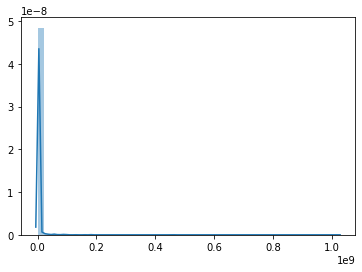

In [7]:
# ax = sns.distplot(time_diffs)
# PLotting a random sample because it is too large
sample = np.random.choice(time_diffs, size=10000)
ax = sns.distplot(sample)

# Plotting Paths

## Singular

In [40]:
json.loads(data[0]["events"])

[{'clientX': 915, 'clientY': 154, 'type': 'mousemove', 'timeDiff': 9779},
 {'clientX': 915.5556030273438,
  'clientY': 154.4444580078125,
  'type': 'pointerdown',
  'timeDiff': 9780},
 {'clientX': 915, 'clientY': 154, 'type': 'mousedown', 'timeDiff': 9780},
 {'clientX': 915.5556030273438,
  'clientY': 154.4444580078125,
  'type': 'pointerup',
  'timeDiff': 9797},
 {'clientX': 915, 'clientY': 154, 'type': 'mouseup', 'timeDiff': 9797},
 {'clientX': 915, 'clientY': 154, 'type': 'click', 'timeDiff': 9798}]

In [49]:
import copy
example = copy.deepcopy(json.loads(data[0]["events"]))
example, len(example)

([{'clientX': 915, 'clientY': 154, 'type': 'mousemove', 'timeDiff': 9779},
  {'clientX': 915.5556030273438,
   'clientY': 154.4444580078125,
   'type': 'pointerdown',
   'timeDiff': 9780},
  {'clientX': 915, 'clientY': 154, 'type': 'mousedown', 'timeDiff': 9780},
  {'clientX': 915.5556030273438,
   'clientY': 154.4444580078125,
   'type': 'pointerup',
   'timeDiff': 9797},
  {'clientX': 915, 'clientY': 154, 'type': 'mouseup', 'timeDiff': 9797},
  {'clientX': 915, 'clientY': 154, 'type': 'click', 'timeDiff': 9798}],
 6)

In [50]:
# formatting so the list[dict] to list[[X, Y]]
coords = []
for entry in example:
    entry.pop("type", 0)
    entry.pop("timeDiff", 0)
    coords.append([entry.pop("clientX"), entry.pop("clientY")])
coords = np.array(coords)
coords.shape

(6, 2)

In [51]:
def get_paths_coords(paths):
    """
    Gets the X,Y coordinates for `paths`
    Args:
        paths (np.ndarray): with shape (num_paths, num_coords_per_path, 2)
    Returns:
        (X, Y): tuple of lists of the coordinates
    """
    for path in paths:
        X = []
        Y = []

        for point in path:
            X.append(point[0])
            Y.append(point[1])
    return (X, Y)

In [52]:
X, Y = get_paths_coords(coords[None])
X, Y

([915.0, 915.5556030273438, 915.0, 915.5556030273438, 915.0, 915.0],
 [154.0, 154.4444580078125, 154.0, 154.4444580078125, 154.0, 154.0])

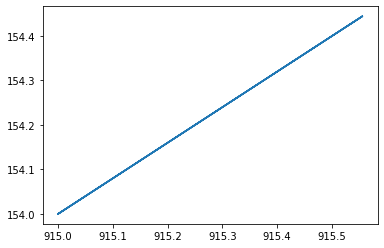

In [53]:
plt.plot(X, Y)

## Multiple

In [ ]:
# generalized parsing functions
import copy
example = copy.deepcopy(json.loads(data[0]["events"]))
example, len(example)
# formatting so the list[dict] to list[[X, Y]]
coords = []
for entry in example:
    entry.pop("type", 0)
    entry.pop("timeDiff", 0)
    coords.append([entry.pop("clientX"), entry.pop("clientY")])
coords = np.array(coords)
coords.shape
X, Y = get_paths_coords(coords[None])
X, Y

In [72]:
from tqdm import tqdm

def parse_data_into_coords(data_list):
    """Parses the data json dicttionary into coordinates.
    
    Args:
        data_dict (list[dict]: The original json loaded as a list of dictionaries
    
    Returns:
        coords_all (list[list[[X, Y]]]): nested list of paths (list of coordinates)
    """
    # nested list of all lists of coordinates
    coords_all = []
    for session_dict in tqdm(data_list):
        events = json.loads(session_dict["events"])
        # formatting so the list[dict] to list[[X, Y]]
        coords = []
        for entry in events:
            # appending coordinate
            if "clientX" in list(entry.keys()) and "clientY" in list(entry.keys()):
                coords.append([entry.pop("clientX"), entry.pop("clientY")])
        # appending that session's path (list of coordinates)
        coords_all.append(coords)
    return coords_all

In [73]:
copied_data = copy.deepcopy(data)

In [74]:
coords = parse_data_into_coords(copied_data)
len(coords), coords[0]

100%|██████████████████████████████████| 83797/83797 [01:15<00:00, 1104.93it/s]


(83797,
 [[915, 154],
  [915.5556030273438, 154.4444580078125],
  [915, 154],
  [915.5556030273438, 154.4444580078125],
  [915, 154],
  [915, 154]])

In [75]:
def plot_paths(paths):
    """Utility function to plot to an existing plt.figure.
    """
    for path in paths:
        X = []
        Y = []

        for point in path:
            X.append(point[0])
            Y.append(point[1])

        plt.plot(X, Y)
    return

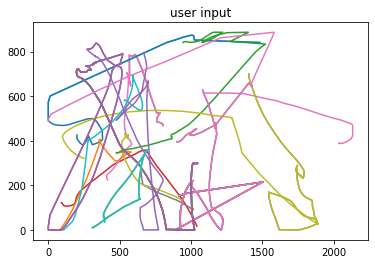

In [79]:
plt.figure(1)
plt.title('user input')
i = 30
plot_paths(coords[:i])
    